In [0]:
spark.createDataFrame(base_emprestimos_df).write.mode("overwrite").saveAsTable("base_emprestimos")


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


/home/spark-27205d45-6b8c-45c3-b5d9-2a/.ipykernel/32843/command-8716650319588716-4274743349:113: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=emprestimos_ano, x='ano', y='quantidade', palette='Blues_d')


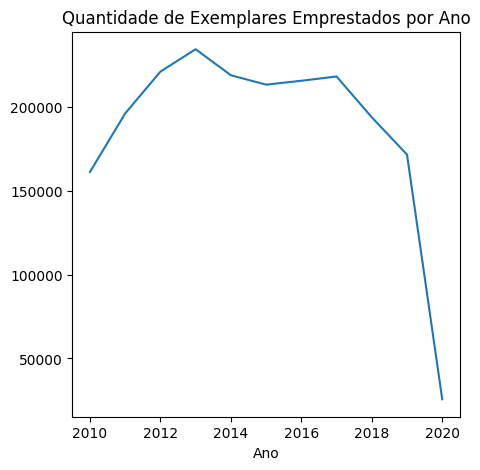

Aqui vemos que conformes os anos foram passando, a quantidade de livros emprestada foi diminuindo


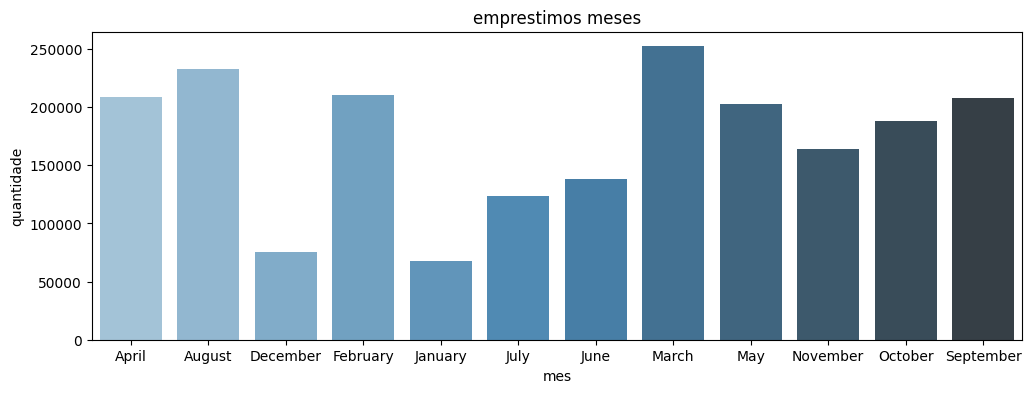

os meses de maior movimento são Março e Agosto e de menor pico Dezembro e Janeiro


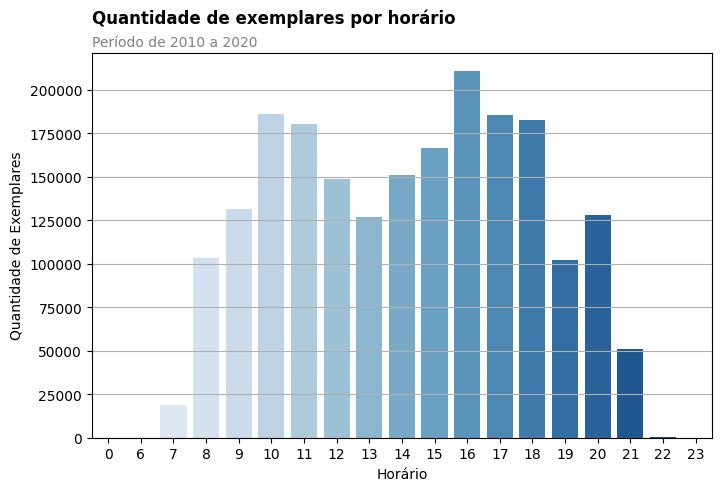

In [0]:
%pip install pandas seaborn matplotlib openpyxl
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### ingestão de dados ######

#recebe o link das bases
url_base = [
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20101.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20102.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20111.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20112.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20121.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20122.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20131.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20132.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20141.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20142.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20151.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20152.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20161.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20162.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20171.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20172.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20181.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20182.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20191.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20192.csv',
    'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20201.csv',

 ]

df_anos = []
#for para ler todos os links de uma vez e armazenar no df_anos
for url in url_base:
    df_vz = pd.read_csv(url)
    df_anos.append(df_vz)

emprestimos_df = pd.concat(df_anos ,  ignore_index=True)

#remover duplicatas
emprestimos_df = emprestimos_df.drop_duplicates()

#nova base com info das bibliotecas no formato parquet
url_exemplares = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/refs/heads/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'
base_exemplares = pd.read_parquet(url_exemplares)

###### fim da ingestao de dados #########

############# ETL ###############################

#fazendo um "proc" unindo a tabela fato com a dimensão (emprestimos e info biblioteca)
base_emprestimos_df = emprestimos_df.merge(base_exemplares)

#transformações tipo de dados da coluna
base_emprestimos_df = base_emprestimos_df.drop(columns=['registro_sistema'])
base_emprestimos_df['matricula_ou_siape'] = base_emprestimos_df['matricula_ou_siape'].astype("string")

#transformando colunas de data
colunas_datas = ['data_emprestimo', 'data_renovacao','data_devolucao']
base_emprestimos_df[colunas_datas] = base_emprestimos_df[colunas_datas].apply(pd.to_datetime, errors='coerce')

# lista de categoria dos livros na ordem correta
labels =[
    'Generalidades. Ciência e conhecimento',
    'Filosofia e psicologia','Religião',
    'Ciências sociais',
    'Classe vaga. Provisoriamente não ocupada',
    'Matemática e ciências naturais',
    'Ciências aplicadas',
    'Belas artes',
    'Linguagem. Língua. Linguística',
    'Geografia. Biografia. História'
]


# funcao que cria a label classe livros, incrementando pelo intervalo que eh bem definido
base_emprestimos_df['classe_livros'] = pd.cut(
    x=base_emprestimos_df['localizacao'],
    bins=[0,99,199,299,399,499,599,699,799,899,1000],
    labels=labels)

##################################################################


# var valores totais qtd emprestimo e livros emprestados
qtd_emprestimos = len(base_emprestimos_df['id_emprestimo'].drop_duplicates())
livros_emprestados = len(base_emprestimos_df['id_exemplar'])
qtd_livros_disp = len(base_exemplares['codigo_barras'].drop_duplicates())

#data frame com as colunas de apoio de data
emprestimo_por_data_df = base_emprestimos_df['data_emprestimo'].value_counts().reset_index()
emprestimo_por_data_df.columns = ['data','quantidade']


emprestimo_por_data_df['ano'] = emprestimo_por_data_df['data'].dt.year
emprestimo_por_data_df['mes'] = emprestimo_por_data_df['data'].dt.month_name()

emprestimo_por_data_df['dia'] = emprestimo_por_data_df['data'].dt.day
emprestimo_por_data_df['hora'] = emprestimo_por_data_df['data'].dt.hour

#colunas agrupadas por quantidade
emprestimos_ano = emprestimo_por_data_df.groupby('ano')['quantidade'].sum().reset_index()
emprestimos_mes = emprestimo_por_data_df.groupby('mes')['quantidade'].sum().reset_index()
emprestimos_hora = emprestimo_por_data_df.groupby('hora')['quantidade'].sum().reset_index()

################## graficos #################### 

#grafico de linha emprestismos x ano
plt.figure(figsize=(5,5))
sns.lineplot(data=emprestimos_ano, x='ano', y='quantidade', palette='Blues_d')
plt.title('Quantidade de Exemplares Emprestados por Ano')
plt.xlabel('Ano')
plt.ylabel(None)
plt.show()

print("Aqui vemos que conformes os anos foram passando, a quantidade de livros emprestada foi diminuindo")


#grafico de barra emprestimos x mes

plt.figure(figsize=(12,4))
sns.barplot(x= emprestimos_mes['mes'], y = emprestimos_mes['quantidade'], palette='Blues_d')
plt.title("emprestimos meses")

plt.show()

print("os meses de maior movimento são Março e Agosto e de menor pico Dezembro e Janeiro")


# grafico de barra mais elaborado de emprestimos x hora

plt.figure(figsize=(8,5))
sns.barplot(data=emprestimos_hora, x='hora', y='quantidade', palette='Blues', dodge=False)

plt.xlabel('Horário')
plt.ylabel('Quantidade de Exemplares')
plt.title("Quantidade de exemplares por horário\n", size=12, loc='left', weight='bold')

plt.text(x=-0.5, y=225000, s='Período de 2010 a 2020', fontsize=10, ha='left', color='gray')

plt.legend([], [], frameon=False)
plt.grid(True, axis='y')
plt.show()

############ função para analisar a frequencia dos dados da tabela escolhida ##############

def df_emprestimos(coluna_analisada):
    frequencia = base_emprestimos_df[coluna_analisada].value_counts()
    porcentagem = (frequencia / sum(frequencia))* 100
    
    tabela_analise = pd.DataFrame(
    {
        "frequencia" : frequencia,
        "porcentagem" : porcentagem.round(2)
    })
    
    tabela_analise.reset_index(inplace=True)
    tabela_analise.columns = ['categoria', 'frequencia', 'porcentagem']
    
    return tabela_analise

#substituir o valor pela coluna que deseja analisar
df_emprestimos('classe_livros')

##################################################################################

#inputando nova base de dados dos alunos da graduacao pelo execel e em seguida modelo json

cadastro_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/refs/heads/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',skiprows=1 , sheet_name='Até 2010')
cadastro_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/refs/heads/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',skiprows=1, sheet_name='Após 2010')

#aqui redefinimos o caechalho da coluna para ficar no padrao já usado de nome, se repararmos eh o modelo usado no arquivo json
#vamos precisar concatenar ele também
cadastro_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']
cadastro_depois_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']

df_matriculas_excel = pd.concat([cadastro_antes_2010, cadastro_depois_2010])

df_matriculas_excel['matricula_ou_siape'] = df_matriculas_excel['matricula_ou_siape'].astype("string")

## arquivo json

base_cadastro_json = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/refs/heads/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json'
matriculas_json = pd.read_json(base_cadastro_json)


#aqui pegamos o indice 0 para pegar os alunos da graduação e 1 para pos
graducacao_arq_json = pd.read_json(matriculas_json['registros'][0])
pos_graduacao_arq_json = pd.read_json(matriculas_json['registros'][1])

#preciso para ficar no padrão xxxxxxx.0 
graducacao_arq_json['matricula_ou_siape'] = graducacao_arq_json['matricula_ou_siape'].astype('float')
pos_graduacao_arq_json['matricula_ou_siape'] = pos_graduacao_arq_json['matricula_ou_siape'].astype('float')
#aqui formatamos para string como todas as outras colunas de matricula
graducacao_arq_json['matricula_ou_siape'] = graducacao_arq_json['matricula_ou_siape'].astype('string')
pos_graduacao_arq_json['matricula_ou_siape'] = pos_graduacao_arq_json['matricula_ou_siape'].astype('string')

#vamos concatenar os arquivos do excel com o json ignornado o index anterior 
# aqui temos arquivos de antes de 2010 e depois de 2010 que estavam separados, graduação + pos
graduacao_completo_df = pd.concat([df_matriculas_excel, graducacao_arq_json, pos_graduacao_arq_json], ignore_index=True)

####################################

#salvando as bases em csv

# Salvar os dados principais
#base_emprestimos_df.to_csv("base_emprestimos.csv", index=False)
#graduacao_completo_df.to_csv("cadastro_alunos.csv", index=False)
base_emprestimos_df.to_csv("/tmp/base_emprestimos.csv", index=False)
graduacao_completo_df.to_csv("/tmp/graduacao_completo_df.csv", index=False)

spark.createDataFrame(base_emprestimos_df).createOrReplaceTempView("base_emprestimos_temp")
spark.createDataFrame(graduacao_completo_df).createOrReplaceTempView("graduacao_completo_df")


